In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
# Load the dataset
df = pd.read_csv('./data/raw/train.csv')

In [9]:
df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [10]:
df.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [11]:
df.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

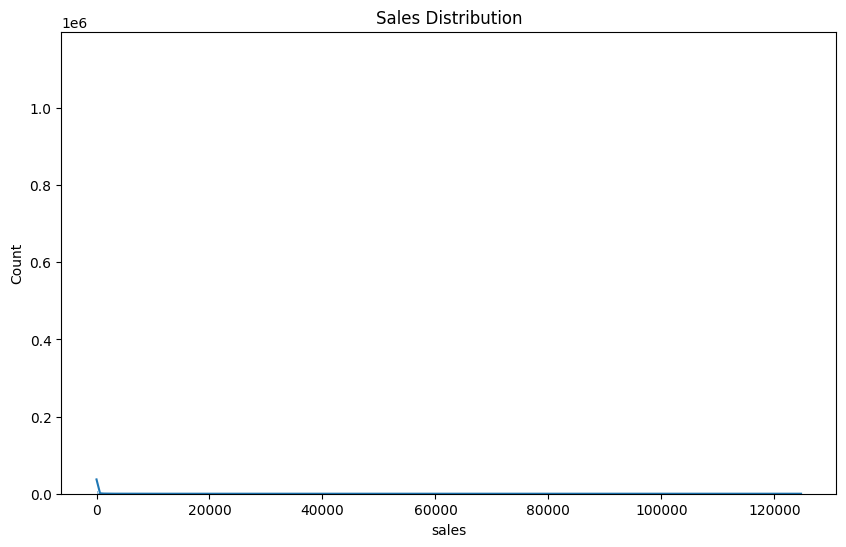

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(df['sales'], kde=True)
plt.title('Sales Distribution')
plt.show()

In [13]:
# Check for unique values and their counts in the sales column
df['sales'].value_counts()


sales
0.000       939130
1.000       115291
2.000        85959
3.000        68575
4.000        57846
             ...  
116.541          1
363.533          1
141.322          1
409.879          1
2419.729         1
Name: count, Length: 379610, dtype: int64

In [14]:
# Check for negative or zero sales
negative_sales = df[df['sales'] <= 0]
print(negative_sales)

              id        date  store_nbr                      family  sales  \
0              0  2013-01-01          1                  AUTOMOTIVE    0.0   
1              1  2013-01-01          1                   BABY CARE    0.0   
2              2  2013-01-01          1                      BEAUTY    0.0   
3              3  2013-01-01          1                   BEVERAGES    0.0   
4              4  2013-01-01          1                       BOOKS    0.0   
...          ...         ...        ...                         ...    ...   
3000839  3000839  2017-08-15          8             HOME APPLIANCES    0.0   
3000853  3000853  2017-08-15          8  SCHOOL AND OFFICE SUPPLIES    0.0   
3000856  3000856  2017-08-15          9                   BABY CARE    0.0   
3000859  3000859  2017-08-15          9                       BOOKS    0.0   
3000872  3000872  2017-08-15          9             HOME APPLIANCES    0.0   

         onpromotion  
0                  0  
1                

/var/folders/rg/rw4cwbgn1x5d6bgg__qvm2h40000gn/T/ipykernel_33109/897360632.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['log_sales'] = np.log(df_filtered['sales'])


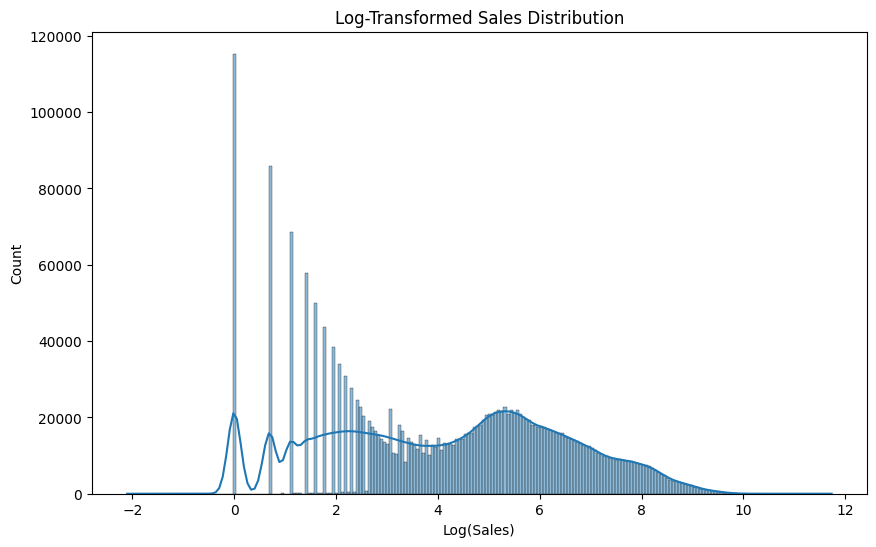

In [19]:
# Apply log transformation to sales
df_filtered['log_sales'] = np.log(df_filtered['sales'])

# Plot the log-transformed sales distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['log_sales'], kde=True)
plt.title('Log-Transformed Sales Distribution')
plt.xlabel('Log(Sales)')
plt.show()

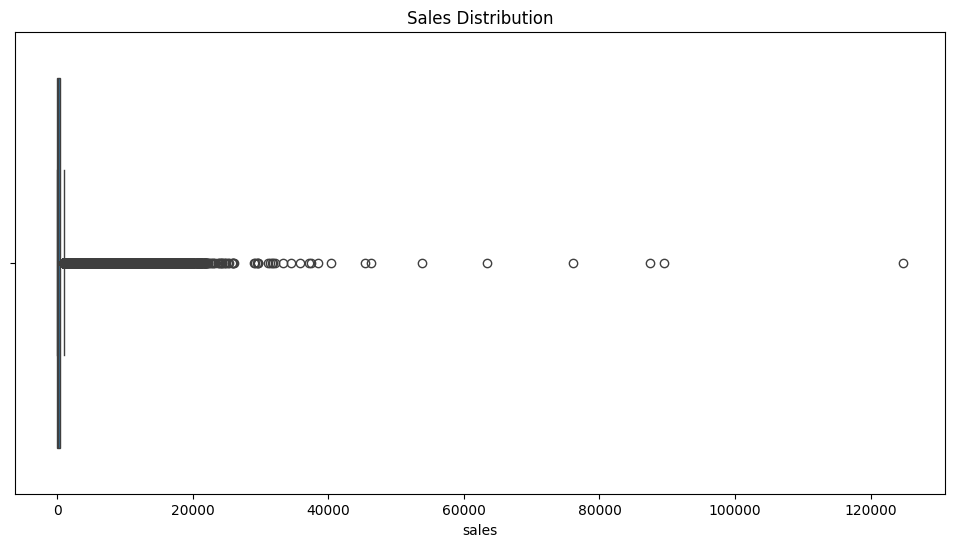

count    2.061758e+06
mean     5.207425e+02
std      1.297187e+03
min      1.220000e-01
25%      9.000000e+00
50%      7.846250e+01
75%      3.880000e+02
max      1.247170e+05
Name: sales, dtype: float64


In [20]:
# Boxplot of sales
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_filtered['sales'])
plt.title('Sales Distribution')
plt.show()

# Summary statistics of sales
print(df_filtered['sales'].describe())


In [21]:
# Time series plot of sales
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

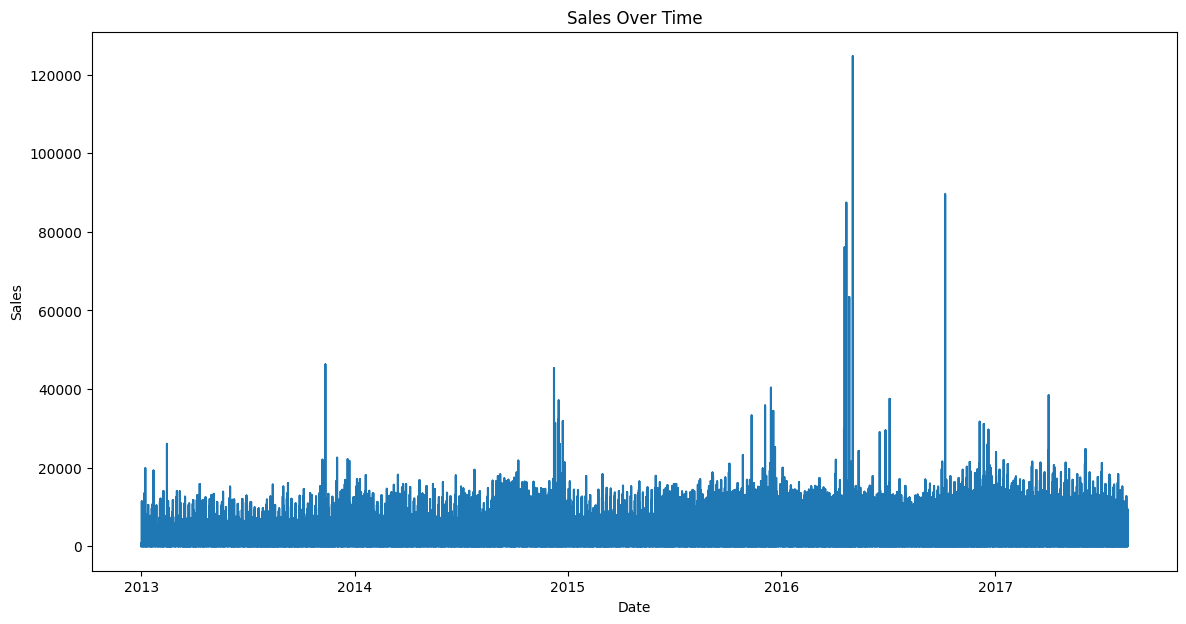

In [22]:
plt.figure(figsize=(14, 7))
plt.plot(df['sales'])
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

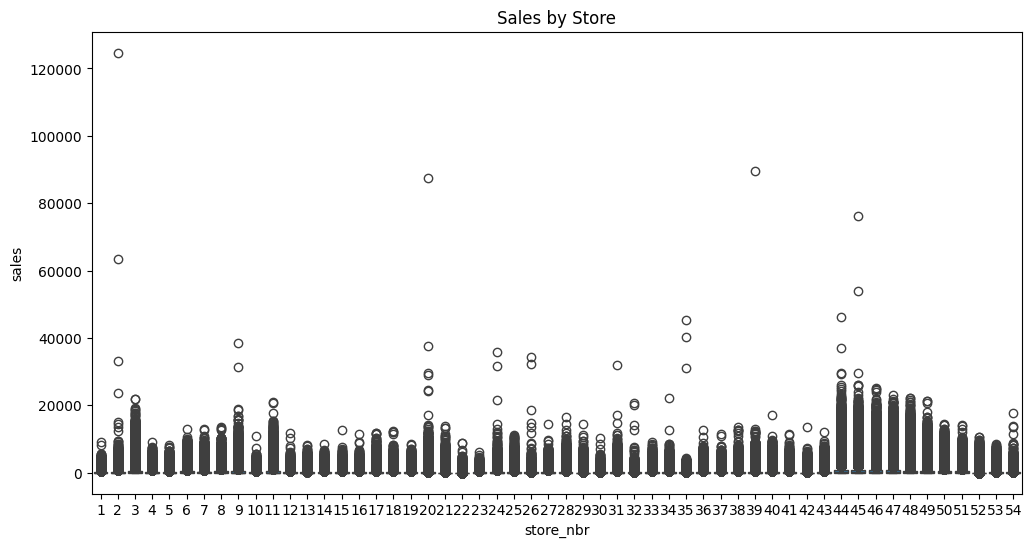

In [23]:
# Sales by store
plt.figure(figsize=(12, 6))
sns.boxplot(x='store_nbr', y='sales', data=df)
plt.title('Sales by Store')
plt.show()

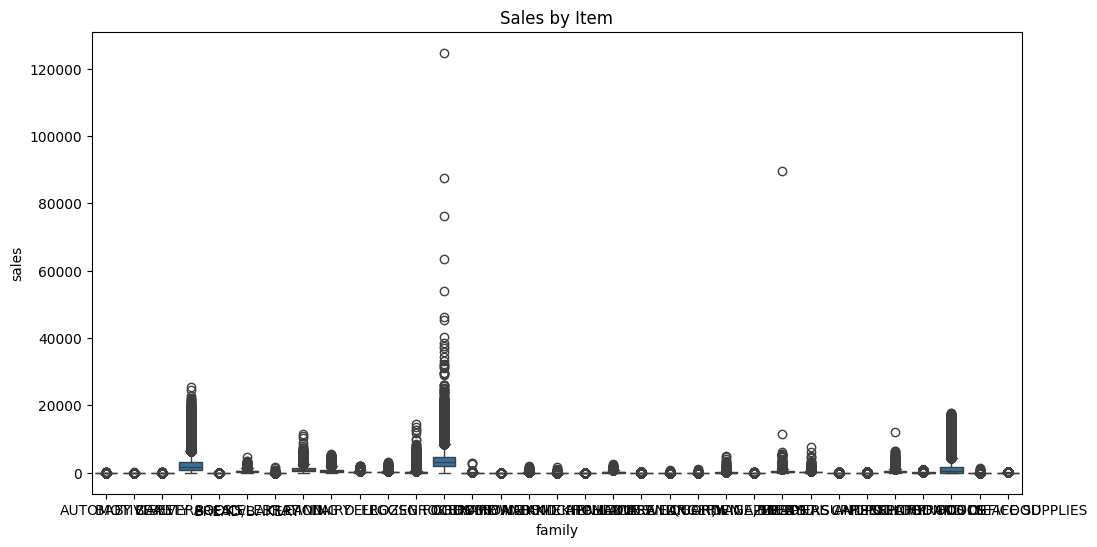

In [25]:
# Sales by item
plt.figure(figsize=(12, 6))
sns.boxplot(x='family', y='sales', data=df)
plt.title('Sales by Item')
plt.show()